### Result

In [3]:
import os
import json
import pandas as pd
import sys

subjects=[f"A0{i+1}" for i in range(9)]
home_dir = os.getcwd()
project_root = os.path.dirname(os.path.dirname(home_dir))
sys.path.append(project_root)

from src.utils.config import ACQ_FUNC_LIST, FREQ_BANDS_LIST

print(ACQ_FUNC_LIST, FREQ_BANDS_LIST)

['EI', 'PI', 'LCB'] [[8, 13], [13, 30]]


In [4]:
result = []
for subject in subjects:
    for min_freq,max_freq in FREQ_BANDS_LIST:
        for acq_func in ACQ_FUNC_LIST:
            result_dir = os.path.abspath(os.path.join(home_dir, f"../bayescspsvmfixed/{subject}/TPE/{acq_func}_{min_freq}_{max_freq}"))
            file= os.path.join(result_dir,"best_eeg_params.json")
            with open(file, 'r') as file:
                data = json.load(file)
            data['subject']=subject
            data['min_freq']=min_freq
            data['max_freq']=max_freq
            result.append(data)
df = pd.DataFrame(result)
df

,t_start,t_end,n_components,C,kernel,accuracy,gamma,acq_func,kappa,subject,min_freq,max_freq
0,0.387,3.806,2,1.265095,linear,0.788385,scale,EI,0.601852,A01,8,13
1,0.649,3.607,8,0.125797,linear,0.881851,scale,PI,0.773148,A01,8,13
2,0.472,3.647,6,0.452659,linear,0.878282,scale,LCB,0.773148,A01,8,13
3,0.402,3.816,7,0.578487,linear,0.888748,scale,EI,0.768519,A01,13,30
4,0.540,4.000,6,0.108736,linear,0.874894,scale,PI,0.759259,A01,13,30
5,0.448,3.483,6,0.150231,linear,0.871567,scale,LCB,0.694444,A01,13,30
6,0.330,3.041,8,110.996222,rbf,0.524561,0.001893,EI,0.120370,A02,8,13
7,0.121,3.054,7,25.786758,rbf,0.513672,0.014864,PI,0.143519,A02,8,13
8,0.670,3.077,7,3.295771,linear,0.517725,scale,LCB,0.138889,A02,8,13
9,1.047,3.994,7,0.568991,linear,0.739504,scale,EI,0.462963,A02,13,30


In [6]:
result=df[[ 'subject', 'acq_func', 'min_freq', 'max_freq', 't_start', 't_end', 'n_components', 'C', 'kernel', 'gamma', 'accuracy', 'kappa']]
result=result.rename(columns={'accuracy': 'cv'})
result

,subject,acq_func,min_freq,max_freq,t_start,t_end,n_components,C,kernel,gamma,cv,kappa
0,A01,EI,8,13,0.387,3.806,2,1.265095,linear,scale,0.788385,0.601852
1,A01,PI,8,13,0.649,3.607,8,0.125797,linear,scale,0.881851,0.773148
2,A01,LCB,8,13,0.472,3.647,6,0.452659,linear,scale,0.878282,0.773148
3,A01,EI,13,30,0.402,3.816,7,0.578487,linear,scale,0.888748,0.768519
4,A01,PI,13,30,0.540,4.000,6,0.108736,linear,scale,0.874894,0.759259
5,A01,LCB,13,30,0.448,3.483,6,0.150231,linear,scale,0.871567,0.694444
6,A02,EI,8,13,0.330,3.041,8,110.996222,rbf,0.001893,0.524561,0.120370
7,A02,PI,8,13,0.121,3.054,7,25.786758,rbf,0.014864,0.513672,0.143519
8,A02,LCB,8,13,0.670,3.077,7,3.295771,linear,scale,0.517725,0.138889
9,A02,EI,13,30,1.047,3.994,7,0.568991,linear,scale,0.739504,0.462963


In [7]:
# result1
result1 = result.drop('kappa', axis=1)
result1 = result1.round({"cv":3})
result1.to_csv('result1_svmfixed.csv')
result1

,subject,acq_func,min_freq,max_freq,t_start,t_end,n_components,C,kernel,gamma,cv
0,A01,EI,8,13,0.387,3.806,2,1.265095,linear,scale,0.788
1,A01,PI,8,13,0.649,3.607,8,0.125797,linear,scale,0.882
2,A01,LCB,8,13,0.472,3.647,6,0.452659,linear,scale,0.878
3,A01,EI,13,30,0.402,3.816,7,0.578487,linear,scale,0.889
4,A01,PI,13,30,0.540,4.000,6,0.108736,linear,scale,0.875
5,A01,LCB,13,30,0.448,3.483,6,0.150231,linear,scale,0.872
6,A02,EI,8,13,0.330,3.041,8,110.996222,rbf,0.001893,0.525
7,A02,PI,8,13,0.121,3.054,7,25.786758,rbf,0.014864,0.514
8,A02,LCB,8,13,0.670,3.077,7,3.295771,linear,scale,0.518
9,A02,EI,13,30,1.047,3.994,7,0.568991,linear,scale,0.740


In [34]:
# Result 3
result3 = pd.DataFrame()
for subject in subjects:
    temp = result[result['subject']==subject]
    result3=pd.concat([result3, result.iloc[[temp['kappa'].idxmax()],:]])
result3.to_csv('result3_svmfixed.csv')
result3

,subject,acq_func,min_freq,max_freq,t_start,t_end,n_components,C,kernel,gamma,cv,kappa
1,A01,PI,8,13,0.649,3.607,8,0.125797,linear,scale,0.881851,0.773148
9,A02,EI,13,30,1.047,3.994,7,0.568991,linear,scale,0.739504,0.462963
16,A03,PI,13,30,0.523,4.000,7,0.330865,linear,scale,0.916636,0.750000
21,A04,EI,13,30,0.466,4.000,8,0.613379,linear,scale,0.596975,0.518519
28,A05,PI,13,30,0.741,1.976,3,0.368689,linear,scale,0.586570,0.259259
33,A06,EI,13,30,0.413,3.677,4,11.107868,rbf,0.015315,0.579855,0.402778
41,A07,LCB,13,30,0.462,2.950,7,2.495277,linear,scale,0.854325,0.666667
43,A08,PI,8,13,0.400,2.843,7,1.471200,linear,scale,0.864670,0.768519
48,A09,EI,8,13,0.580,1.584,8,0.102185,linear,scale,0.888990,0.662037


In [14]:
# Result 3 alt highest cv
result3cv = pd.DataFrame()
for subject in subjects:
    temp = result1[result['subject']==subject]
    result3cv=pd.concat([result3cv, result.iloc[[temp['cv'].idxmax()],:]])
result3cv

,subject,acq_func,min_freq,max_freq,t_start,t_end,n_components,C,kernel,gamma,cv,kappa
3,A01,EI,13,30,0.402,3.816,7,0.578487,linear,scale,0.888748,0.768519
9,A02,EI,13,30,1.047,3.994,7,0.568991,linear,scale,0.739504,0.462963
17,A03,LCB,13,30,0.488,4.000,8,46.132455,rbf,0.007226,0.923533,0.740741
23,A04,LCB,13,30,0.338,2.751,8,260.055647,rbf,0.001601,0.607804,0.462963
27,A05,EI,13,30,0.601,2.112,4,0.772848,linear,scale,0.590139,0.231481
35,A06,LCB,13,30,0.325,3.782,6,0.512987,linear,scale,0.586993,0.370370
41,A07,LCB,13,30,0.462,2.950,7,2.495277,linear,scale,0.854325,0.666667
44,A08,LCB,8,13,0.418,3.028,8,0.641044,linear,scale,0.871506,0.699074
50,A09,LCB,8,13,0.492,1.676,8,6.399621,rbf,0.012519,0.902783,0.652778


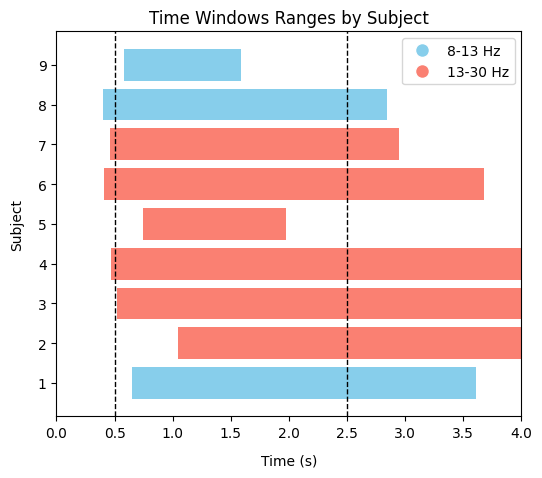

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 5))
# Calculate bar widths
result3['width'] = result3['t_end'] - result3['t_start']
colors = result3['min_freq'].map({8:'skyblue', 13:'salmon'})
result3['subject'] =[str(i+1) for i in range(9)]

# Plot using matplotlib
ax.barh(result3['subject'], 
        result3['width'], 
        left=result3['t_start'], 
        color=colors)

handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='8-13 Hz'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='salmon', markersize=10, label='13-30 Hz')
]
ax.legend(handles=handles, loc='upper right')

# Add black vertical lines at x=0.5 and x=2.5
ax.axvline(x=0.5, color='black', linestyle='--', linewidth=1)  # Line at x=0.5
ax.axvline(x=2.5, color='black', linestyle='--', linewidth=1)  # Line at x=2.5


plt.xlabel('Time (s)', labelpad=10)
plt.ylabel('Subject', labelpad=10)
plt.xlim(0, 4)
plt.title('Time Windows Ranges by Subject')
plt.savefig('result1.png', dpi=300)
plt.show()